# Imports

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import torch
import time
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config
from utils.Visual import draw_plot

# Run Adversarial Training

In [4]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
from attacks.pgd import ProjectedGradientDescent

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             }]

# uncomment this if you want to create a new experiment instead!
## experiment = RobustnessExperiment(exp_config, title="EVAL_DATASET2")
experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

Loaded model 0024_EVAL_DATASET2


In [5]:
from utils.TrainHelper import TrainHelper, get_all_models_data
th = TrainHelper()

In [6]:
# define hyperparameters
hparams = torch.load("/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN_8K_Dataset2/optuna_crnn8kd2_0.90.p")['hparams']

In [7]:
hparams

{'batch_size': 64,
 'learning_rate': 0.0006944966354259878,
 'p_dropout': 0.14566410995036227,
 'lr_decay': 0.7701556821690759,
 'n_hidden': 951,
 'lstm_hidden_size': 951,
 'weight_decay': 0.020086684067460947}

In [35]:
hparams["epochs"] = 50

In [9]:
##############################################################################################################
##############################################################################################################
##############################################################################################################

from attacks.pgd import ProjectedGradientDescent

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.CRNN import CRNNPLModule
from classification.models.DeepRecursiveCNN import DeepRecursiveCNNPLModule
from classification.models.SpectrogramCNN_8K_Dataset2 import SpectrogramCNN_8K_Dataset2_PLModule
from classification.models.CRNN_8k_D2 import CRNN8k_D2_PLModule

# define attack configs
attack_configs = []
for i in range(50):
    epsilon = 0.1 + (i)/100
    attack_configs.append(
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[epsilon], "num_iter": [1]
                                     },
                       "META": {"TITLE": f"L_inf_eps={epsilon}_iters=1"}
                       },
    )

In [36]:
attack_configs = []
attack_configs.extend([
                      {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.01], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.01}_iters=2"}
                       },
                       {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.02], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.02}_iters=2"}
                       },
                       {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.03], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.03}_iters=2"}
                       },
                        {"ATTACK_CLASS": ProjectedGradientDescent, 
                       "ATTACK_ARGS": {"norm":["inf"], 
                                       "epsilon":[0.05], "num_iter": [2]
                                     },
                       "META": {"TITLE": f"L_inf_eps={0.05}_iters=2"}
                       }])

In [37]:
models = th.run(CRNN8k_D2_PLModule, hparams, attack_configs, save_epochs = [10,20,30,40], dataset_id=config.DATASET_CONTROL)
##############################################################################################################
##############################################################################################################
##############################################################################################################

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                      | Type                  | Params
----------------------------------------------------------------
0  | model                     | CRNN8k_D2             | 5 M   
1  | model.spec                | MelspectrogramStretch | 0     
2  | model.spec.spectrogram    | Spectrogram           | 0     
3  | model.spec.mel_scale      | MelScale              | 0     
4  | model.spec.stft           | Spectrogram           | 0     
5  | model.spec.random_stretch | RandomTimeStretch     | 0   

loaded!
Training Models with Attack ProjectedGradientDescent (1 of 4)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.03793716656787196


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8109069353882632
Train-Acc=0.6758893280632411


Val-Acc=0.8482513337285121
Train-Acc=0.708498023715415


Val-Acc=0.8654416123295792
Train-Acc=0.7237154150197629


Val-Acc=0.8654416123295792
Train-Acc=0.7268774703557312


Val-Acc=0.8571428571428571
Train-Acc=0.7361660079051383


Val-Acc=0.8642560758743332
Train-Acc=0.7472332015810277


Val-Acc=0.8233550681683461
Train-Acc=0.750197628458498


Val-Acc=0.8761114404267931
Train-Acc=0.7577075098814229


Val-Acc=0.8749259039715471
Train-Acc=0.758893280632411


Val-Acc=0.8695909899229401
Train-Acc=0.7652173913043478
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_10.p"


Val-Acc=0.8826318909306461
Train-Acc=0.7697628458498024


Val-Acc=0.8820391227030231
Train-Acc=0.7699604743083004


Val-Acc=0.8802608180201541
Train-Acc=0.7699604743083004


Val-Acc=0.8755186721991701
Train-Acc=0.7693675889328063


Val-Acc=0.8731475992886781
Train-Acc=0.7701581027667984


Val-Acc=0.8577356253704801
Train-Acc=0.7725296442687747


Val-Acc=0.8826318909306461
Train-Acc=0.7739130434782608


Val-Acc=0.8790752815649081
Train-Acc=0.7747035573122529


Val-Acc=0.8784825133372851
Train-Acc=0.7798418972332016


Val-Acc=0.8873740367516301
Train-Acc=0.7770750988142292
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_20.p"


Val-Acc=0.8755186721991701
Train-Acc=0.7707509881422925


Val-Acc=0.8844101956135151
Train-Acc=0.7766798418972332


Val-Acc=0.8873740367516301
Train-Acc=0.7689723320158103


Val-Acc=0.8719620628334321
Train-Acc=0.7733201581027668


Val-Acc=0.8778897451096621
Train-Acc=0.7747035573122529


Val-Acc=0.8826318909306461
Train-Acc=0.7770750988142292


Val-Acc=0.8624777711914642
Train-Acc=0.7766798418972332


Val-Acc=0.8755186721991701
Train-Acc=0.7747035573122529


Val-Acc=0.8707765263781861
Train-Acc=0.775098814229249


Val-Acc=0.8749259039715471
Train-Acc=0.7782608695652173
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_30.p"
Saved checkpoint at epoch 30 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_30.p"


Val-Acc=0.8601066982809722
Train-Acc=0.7810276679841898


Val-Acc=0.8778897451096621
Train-Acc=0.7778656126482213


Val-Acc=0.8755186721991701
Train-Acc=0.7741106719367589


Val-Acc=0.8808535862477771
Train-Acc=0.7715415019762846


Val-Acc=0.8618850029638412
Train-Acc=0.7776679841897233


Val-Acc=0.8648488441019562
Train-Acc=0.7776679841897233


Val-Acc=0.8814463544754001
Train-Acc=0.7784584980237154


Val-Acc=0.8725548310610551
Train-Acc=0.775691699604743


Val-Acc=0.8814463544754001
Train-Acc=0.7735177865612648


Val-Acc=0.8755186721991701
Train-Acc=0.7768774703557312
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_40.p"
Saved checkpoint at epoch 40 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52_epoch_40.p"


Val-Acc=0.8547717842323651
Train-Acc=0.775296442687747


Val-Acc=0.8571428571428571
Train-Acc=0.7739130434782608


Val-Acc=0.8784825133372851
Train-Acc=0.775098814229249


Val-Acc=0.8719620628334321
Train-Acc=0.7800395256916997


Val-Acc=0.8749259039715471
Train-Acc=0.775296442687747


Val-Acc=0.8861885002963841
Train-Acc=0.7772727272727272


Val-Acc=0.8737403675163011
Train-Acc=0.7772727272727272


Val-Acc=0.8761114404267931
Train-Acc=0.7733201581027668


Val-Acc=0.8695909899229401
Train-Acc=0.7762845849802371


Val-Acc=0.8796680497925311
Train-Acc=0.774901185770751


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                      | Type                  | Params
----------------------------------------------------------------
0  | model                     | CRNN8k_D2             | 5 M   
1  | model.spec                | MelspectrogramStretch | 0     
2  | model.spec.spectrogram    | Spectrogram           | 0     
3  | model.spec.mel_scale      | MelScale              | 0     
4  | model.spec.stft           | Spectrogram           | 0     
5  | model.spec.random_stretch | RandomTimeStretch     | 0   


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52.p"
Training Models with Attack ProjectedGradientDescent (2 of 4)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.03793716656787196


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8126852400711322
Train-Acc=0.6065217391304348


Val-Acc=0.8405453467694132
Train-Acc=0.6146245059288538


Val-Acc=0.8435091879075282
Train-Acc=0.6211462450592885


Val-Acc=0.8512151748666271
Train-Acc=0.6324110671936759


Val-Acc=0.8476585655008891
Train-Acc=0.6474308300395257


Val-Acc=0.8441019561351512
Train-Acc=0.6470355731225297


Val-Acc=0.8535862477771191
Train-Acc=0.6563241106719367


Val-Acc=0.8725548310610551
Train-Acc=0.6711462450592885


Val-Acc=0.8512151748666271
Train-Acc=0.6709486166007905


Val-Acc=0.8737403675163011
Train-Acc=0.6806324110671936
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_10.p"


Val-Acc=0.8666271487848252
Train-Acc=0.682806324110672


Val-Acc=0.8719620628334321
Train-Acc=0.6855731225296443


Val-Acc=0.8660343805572022
Train-Acc=0.6790513833992095


Val-Acc=0.8755186721991701
Train-Acc=0.6940711462450593


Val-Acc=0.8719620628334321
Train-Acc=0.6905138339920949


Val-Acc=0.8784825133372851
Train-Acc=0.6944664031620553


Val-Acc=0.8761114404267931
Train-Acc=0.6958498023715415


Val-Acc=0.8630705394190872
Train-Acc=0.6944664031620553


Val-Acc=0.8565500889152341
Train-Acc=0.7009881422924901


Val-Acc=0.8749259039715471
Train-Acc=0.6936758893280632
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_20.p"


Val-Acc=0.8790752815649081
Train-Acc=0.7


Val-Acc=0.8778897451096621
Train-Acc=0.6934782608695652


Val-Acc=0.8476585655008891
Train-Acc=0.7047430830039526


Val-Acc=0.8731475992886781
Train-Acc=0.6986166007905138


Val-Acc=0.8737403675163011
Train-Acc=0.6978260869565217


Val-Acc=0.8743331357439241
Train-Acc=0.6972332015810276


Val-Acc=0.8684054534676942
Train-Acc=0.6986166007905138


Val-Acc=0.8707765263781861
Train-Acc=0.6978260869565217


Val-Acc=0.8535862477771191
Train-Acc=0.6992094861660079


Val-Acc=0.8701837581505631
Train-Acc=0.6994071146245059
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_30.p"
Saved checkpoint at epoch 30 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_30.p"


Val-Acc=0.8772969768820391
Train-Acc=0.7027667984189724


Val-Acc=0.8743331357439241
Train-Acc=0.6944664031620553


Val-Acc=0.8790752815649081
Train-Acc=0.7017786561264822


Val-Acc=0.8725548310610551
Train-Acc=0.7013833992094861


Val-Acc=0.8767042086544161
Train-Acc=0.7025691699604744


Val-Acc=0.8636633076467102
Train-Acc=0.700197628458498


Val-Acc=0.8559573206876111
Train-Acc=0.7017786561264822


Val-Acc=0.8749259039715471
Train-Acc=0.6996047430830039


Val-Acc=0.8814463544754001
Train-Acc=0.700197628458498


Val-Acc=0.8547717842323651
Train-Acc=0.700197628458498
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_40.p"
Saved checkpoint at epoch 40 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53_epoch_40.p"


Val-Acc=0.8684054534676942
Train-Acc=0.7073122529644269


Val-Acc=0.8601066982809722
Train-Acc=0.7043478260869566


Val-Acc=0.8707765263781861
Train-Acc=0.7073122529644269


Val-Acc=0.8772969768820391
Train-Acc=0.7037549407114625


Val-Acc=0.8672199170124482
Train-Acc=0.7053359683794467


Val-Acc=0.8624777711914642
Train-Acc=0.700395256916996


Val-Acc=0.8565500889152341
Train-Acc=0.6992094861660079


Val-Acc=0.8743331357439241
Train-Acc=0.7045454545454546


Val-Acc=0.8725548310610551
Train-Acc=0.6954545454545454


Val-Acc=0.8689982216953172
Train-Acc=0.7041501976284585



GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                      | Type                  | Params
----------------------------------------------------------------
0  | model                     | CRNN8k_D2             | 5 M   
1  | model.spec                | MelspectrogramStretch | 0     
2  | model.spec.spectrogram    | Spectrogram           | 0     
3  | model.spec.mel_scale      | MelScale              | 0     
4  | model.spec.stft           | Spectrogram           | 0     
5  | model.spec.random_stretch | RandomTimeStretch     | 0   

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53.p"
Training Models with Attack ProjectedGradientDescent (3 of 4)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.03793716656787196


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8126852400711322
Train-Acc=0.5288537549407115


Val-Acc=0.8239478363959691
Train-Acc=0.5537549407114625


Val-Acc=0.8446947243627742
Train-Acc=0.558695652173913


Val-Acc=0.8269116775340841
Train-Acc=0.5521739130434783


Val-Acc=0.8375815056312982
Train-Acc=0.5610671936758893


Val-Acc=0.8393598103141672
Train-Acc=0.5707509881422925


Val-Acc=0.8103141671606402
Train-Acc=0.5731225296442688


Val-Acc=0.8393598103141672
Train-Acc=0.5922924901185771


Val-Acc=0.8310610551274452
Train-Acc=0.5982213438735178


Val-Acc=0.8612922347362182
Train-Acc=0.6102766798418973
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_10.p"


Val-Acc=0.8541790160047421
Train-Acc=0.6181818181818182


Val-Acc=0.8737403675163011
Train-Acc=0.6249011857707509


Val-Acc=0.8375815056312982
Train-Acc=0.6298418972332016


Val-Acc=0.8358032009484292
Train-Acc=0.6229249011857707


Val-Acc=0.8488441019561351
Train-Acc=0.6274703557312253


Val-Acc=0.8630705394190872
Train-Acc=0.6393280632411067


Val-Acc=0.8606994665085952
Train-Acc=0.649802371541502


Val-Acc=0.8654416123295792
Train-Acc=0.6456521739130435


Val-Acc=0.8725548310610551
Train-Acc=0.6523715415019763


Val-Acc=0.8541790160047421
Train-Acc=0.649604743083004
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_20.p"


Val-Acc=0.8559573206876111
Train-Acc=0.6365612648221344


Val-Acc=0.8666271487848252
Train-Acc=0.6484189723320158


Val-Acc=0.8636633076467102
Train-Acc=0.65


Val-Acc=0.8595139300533492
Train-Acc=0.6476284584980238


Val-Acc=0.8547717842323651
Train-Acc=0.6539525691699605


Val-Acc=0.8660343805572022
Train-Acc=0.65


Val-Acc=0.8713692946058091
Train-Acc=0.6511857707509882


Val-Acc=0.8565500889152341
Train-Acc=0.6454545454545455


Val-Acc=0.8636633076467102
Train-Acc=0.6545454545454545


Val-Acc=0.8512151748666271
Train-Acc=0.6515810276679842
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_30.p"
Saved checkpoint at epoch 30 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_30.p"


Val-Acc=0.8761114404267931
Train-Acc=0.6490118577075099


Val-Acc=0.8654416123295792
Train-Acc=0.6492094861660079


Val-Acc=0.8725548310610551
Train-Acc=0.6480237154150198


Val-Acc=0.8731475992886781
Train-Acc=0.6446640316205534


Val-Acc=0.8684054534676942
Train-Acc=0.6474308300395257


Val-Acc=0.8346176644931832
Train-Acc=0.6535573122529644


Val-Acc=0.8749259039715471
Train-Acc=0.6480237154150198


Val-Acc=0.8684054534676942
Train-Acc=0.6411067193675889


Val-Acc=0.8719620628334321
Train-Acc=0.6472332015810277


Val-Acc=0.8470657972732661
Train-Acc=0.649802371541502
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_40.p"
Saved checkpoint at epoch 40 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54_epoch_40.p"


Val-Acc=0.8624777711914642
Train-Acc=0.6480237154150198


Val-Acc=0.8689982216953172
Train-Acc=0.6565217391304348


Val-Acc=0.8512151748666271
Train-Acc=0.6470355731225297


Val-Acc=0.8482513337285121
Train-Acc=0.6529644268774704


Val-Acc=0.8743331357439241
Train-Acc=0.6444664031620554


Val-Acc=0.8458802608180201
Train-Acc=0.6470355731225297


Val-Acc=0.8654416123295792
Train-Acc=0.6438735177865612


Val-Acc=0.8441019561351512
Train-Acc=0.6448616600790514


Val-Acc=0.8642560758743332
Train-Acc=0.6486166007905139


Val-Acc=0.8429164196799052
Train-Acc=0.6470355731225297


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.

   | Name                      | Type                  | Params
----------------------------------------------------------------
0  | model                     | CRNN8k_D2             | 5 M   
1  | model.spec                | MelspectrogramStretch | 0     
2  | model.spec.spectrogram    | Spectrogram           | 0     
3  | model.spec.mel_scale      | MelScale              | 0     
4  | model.spec.stft           | Spectrogram           | 0     
5  | model.spec.random_stretch | RandomTimeStretch     | 0   


Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54.p"
Training Models with Attack ProjectedGradientDescent (4 of 4)
------------------------------------------------------------
Trainig model 1/1
------------------------------------------------------------


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.03852993479549496


/nfs/students/summer-term-2020/project-4/yan/.conda/envs/cnn_project/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8097213989330172
Train-Acc=0.4490118577075099


Val-Acc=0.8334321280379372
Train-Acc=0.43399209486166007


Val-Acc=0.8067575577949022
Train-Acc=0.45118577075098815


Val-Acc=0.8334321280379372
Train-Acc=0.45948616600790515


Val-Acc=0.8441019561351512
Train-Acc=0.4824110671936759


Val-Acc=0.8233550681683461
Train-Acc=0.4849802371541502


Val-Acc=0.8512151748666271
Train-Acc=0.4984189723320158


Val-Acc=0.8464730290456431
Train-Acc=0.49703557312252966


Val-Acc=0.8120924718435092
Train-Acc=0.5092885375494071


Val-Acc=0.8589211618257261
Train-Acc=0.5179841897233202
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_10.p"
Saved checkpoint at epoch 10 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_10.p"


Val-Acc=0.8446947243627742
Train-Acc=0.5296442687747036


Val-Acc=0.8583283935981031
Train-Acc=0.5391304347826087


Val-Acc=0.8630705394190872
Train-Acc=0.5612648221343873


Val-Acc=0.8452874925903971
Train-Acc=0.5697628458498024


Val-Acc=0.8369887374036752
Train-Acc=0.5814229249011857


Val-Acc=0.8304682868998222
Train-Acc=0.5883399209486166


Val-Acc=0.8624777711914642
Train-Acc=0.5800395256916996


Val-Acc=0.8553645524599881
Train-Acc=0.5992094861660079


Val-Acc=0.8506224066390041
Train-Acc=0.5883399209486166


Val-Acc=0.8358032009484292
Train-Acc=0.5982213438735178
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_20.p"
Saved checkpoint at epoch 20 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_20.p"


Val-Acc=0.8494368701837581
Train-Acc=0.5940711462450593


Val-Acc=0.8672199170124482
Train-Acc=0.5936758893280633


Val-Acc=0.8227622999407231
Train-Acc=0.6017786561264822


Val-Acc=0.8689982216953172
Train-Acc=0.5924901185770751


Val-Acc=0.8559573206876111
Train-Acc=0.6025691699604743


Val-Acc=0.8707765263781861
Train-Acc=0.591699604743083


Val-Acc=0.8441019561351512
Train-Acc=0.6037549407114624


Val-Acc=0.8630705394190872
Train-Acc=0.5843873517786561


Val-Acc=0.8642560758743332
Train-Acc=0.5982213438735178


Val-Acc=0.8547717842323651
Train-Acc=0.591699604743083
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_30.p"
Saved checkpoint at epoch 30 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_30.p"


Val-Acc=0.8547717842323651
Train-Acc=0.5968379446640316


Val-Acc=0.8601066982809722
Train-Acc=0.5980237154150198


Val-Acc=0.8648488441019562
Train-Acc=0.599802371541502


Val-Acc=0.8464730290456431
Train-Acc=0.5861660079051383


Val-Acc=0.8452874925903971
Train-Acc=0.6013833992094861


Val-Acc=0.8684054534676942
Train-Acc=0.5986166007905138


Val-Acc=0.8399525785417902
Train-Acc=0.6027667984189723


Val-Acc=0.8423236514522822
Train-Acc=0.5988142292490118


Val-Acc=0.8577356253704801
Train-Acc=0.5893280632411068


Val-Acc=0.8446947243627742
Train-Acc=0.6067193675889329
Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_40.p"
Saved checkpoint at epoch 40 at "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55_epoch_40.p"


Val-Acc=0.8672199170124482
Train-Acc=0.5936758893280633


Val-Acc=0.8233550681683461
Train-Acc=0.5909090909090909


Val-Acc=0.8719620628334321
Train-Acc=0.6009881422924901


Val-Acc=0.8476585655008891
Train-Acc=0.5922924901185771


Val-Acc=0.8636633076467102
Train-Acc=0.5962450592885375


Val-Acc=0.8660343805572022
Train-Acc=0.5948616600790514


Val-Acc=0.8636633076467102
Train-Acc=0.5942687747035573


Val-Acc=0.8482513337285121
Train-Acc=0.5928853754940712


Val-Acc=0.8583283935981031
Train-Acc=0.5930830039525692


Val-Acc=0.8595139300533492
Train-Acc=0.5956521739130435

Saved model to "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p"
Trained Models:
['/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54.p', '/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN8k_D2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p']


# Create Plots

In [10]:
#import os
#directory = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/SpectrogramCNN_8K_Dataset2/"
#for filename in os.listdir(directory):
#    experiment.run(directory + filename, SpectrogramCNN_8K_Dataset2_PLModule, dataset_id=config.DATASET_CONTROL)

In [ ]:
#from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
#experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

#state_dict_path = "/nfs/students/summer-term-2020/project-4/SAVED_MODELS/CRNN_8K_Dataset2/optuna_crnn8kd2_0.90.p"
#experiment.run(state_dict_path, CRNN8k_D2_PLModule, dataset_id=config.DATASET_CONTROL)

Loaded model 0024_EVAL_DATASET2
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:21<00:00,  2.39s/it]


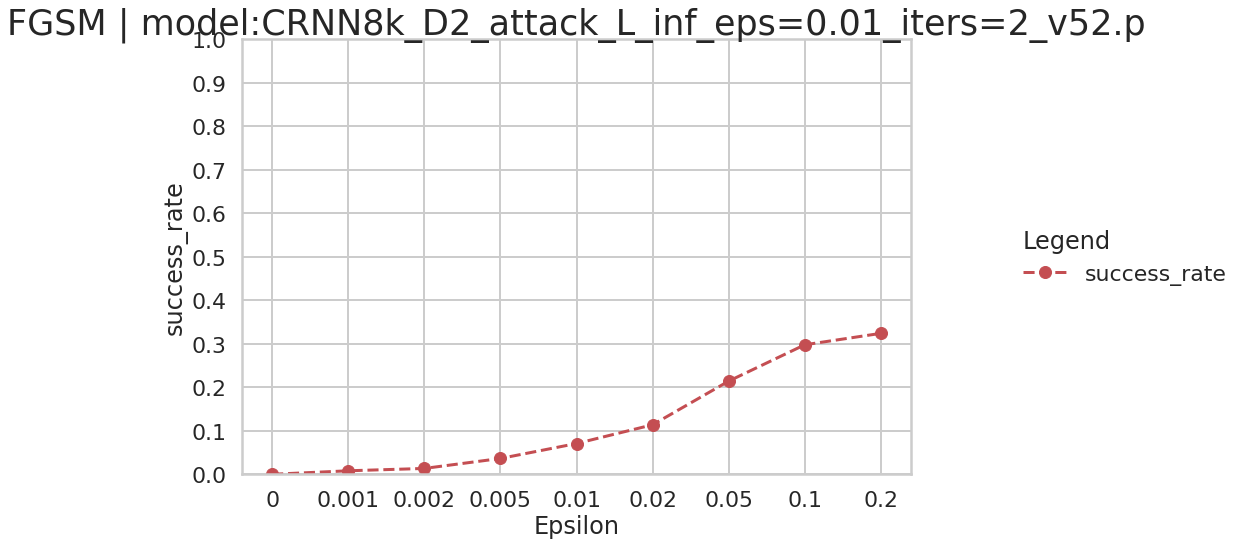

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:21<00:00,  2.35s/it]


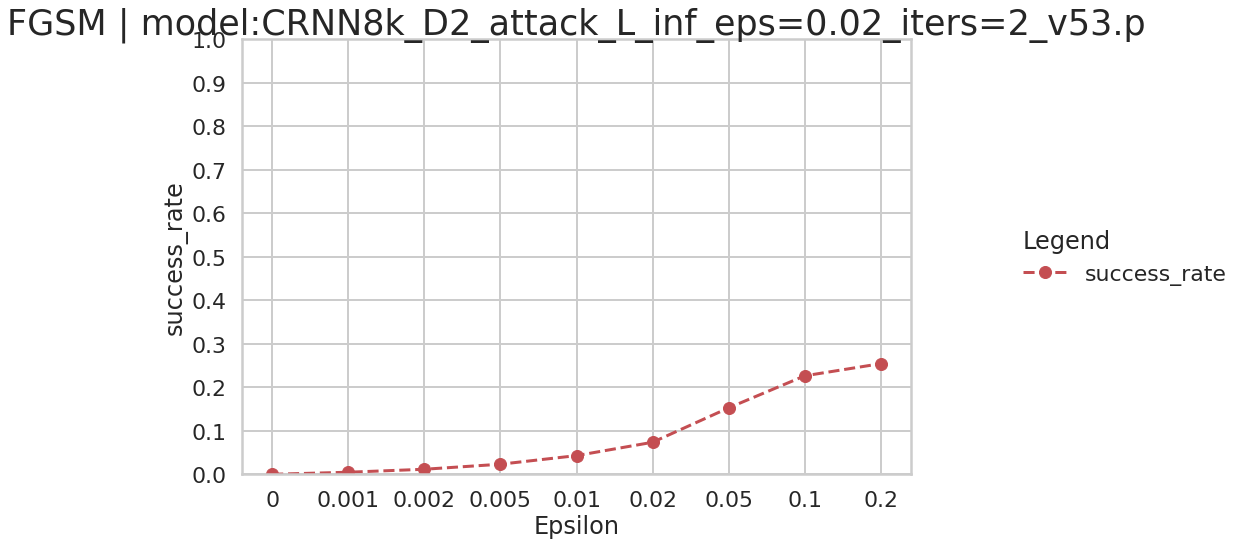

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


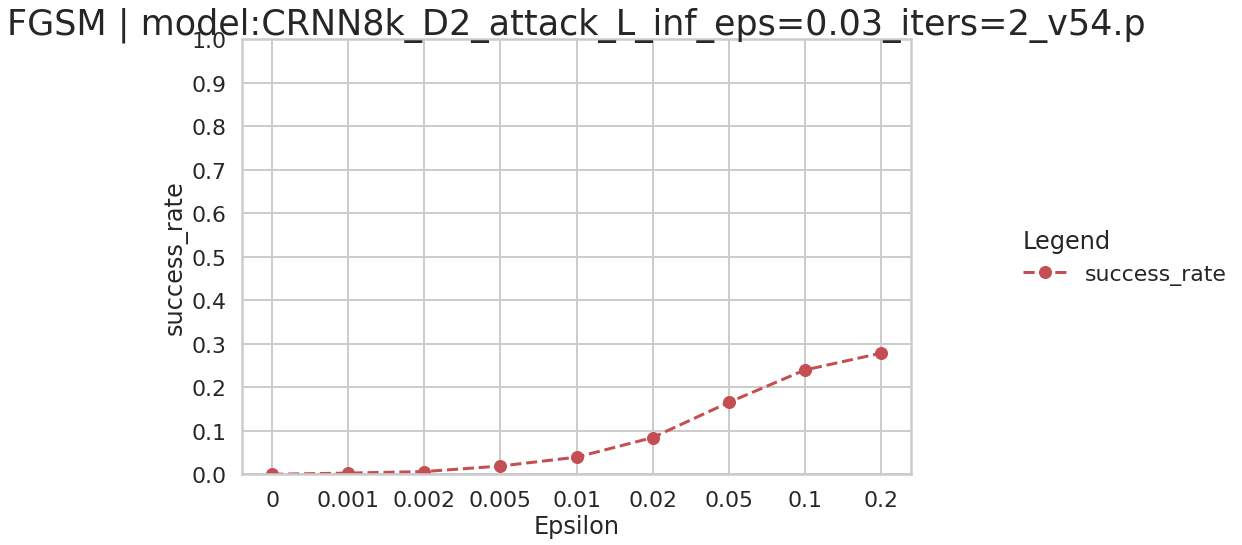

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"
Loading cached training data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/
Loading cached validation data of dataset 1 from /nfs/students/summer-term-2020/project-4/data/dataset2/dataset_8k/


  0%|          | 0/9 [00:00<?, ?it/s]



Running experiment on model CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p
Created Dir '/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p'

Perform Attack #1/1: FGSM


100%|██████████| 9/9 [00:21<00:00,  2.37s/it]


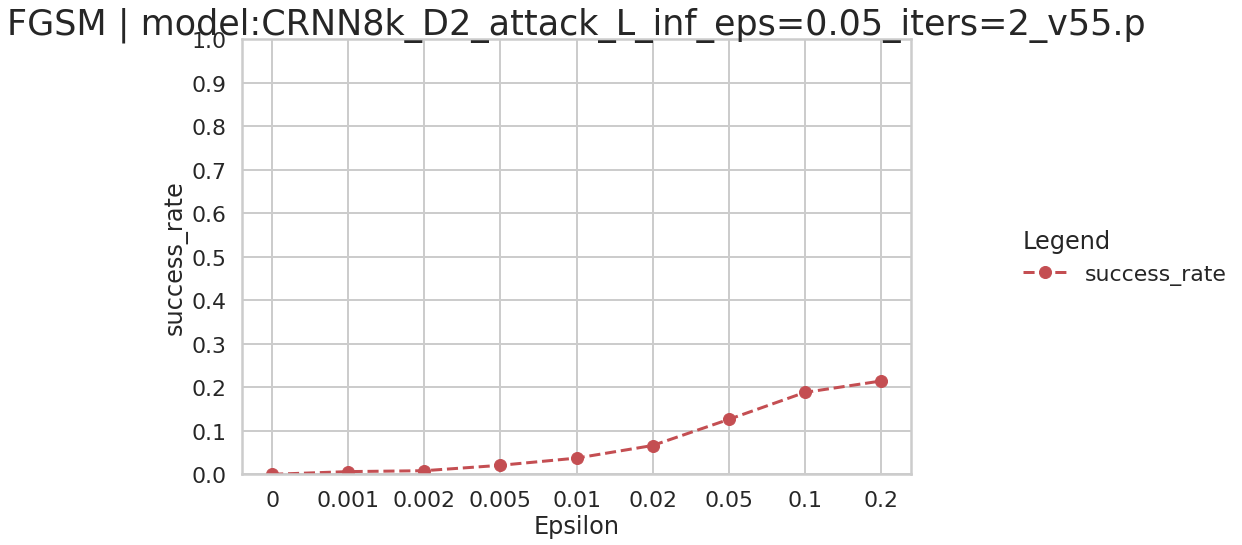

Backup created at "/nfs/students/summer-term-2020/project-4/EXPERIMENTS/0024_EVAL_DATASET2/backup.pickle"


In [38]:
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment
experiment = load_experiment(exp_folder = "0024_EVAL_DATASET2")

for m in models:
    experiment.run(m, CRNN8k_D2_PLModule, dataset_id=config.DATASET_CONTROL)

In [39]:
experiment.show_best_models(best_n=100, metric="acc")


Attack = FGSM:
[(7.161825726141079, 'CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p'), (7.134558387670421, 'CRNN8k_D2_attack_L_inf_eps=0.02_iters=2_v53.p'), (6.967990515708358, 'CRNN8k_D2_attack_L_inf_eps=0.01_iters=2_v52.p'), (6.882039122703023, 'CRNN8k_D2_attack_L_inf_eps=0.03_iters=2_v54.p'), (6.7178423236514515, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p'), (6.6917605216360405, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3_epoch_10.p'), (6.679312388855958, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.1_iters=1_v0.p'), (6.566686425607587, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.21000000000000002_iters=1_v11.p'), (6.541197391819799, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.14_iters=1_v4_epoch_10.p'), (6.525192649673977, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.12000000000000001_iters=1_v2.p'), (6.517486662714878, 'SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.11_iters=1_v1_epoch_10.p'), (6.49199762892709, 'SpectrogramCNN_8K_Data

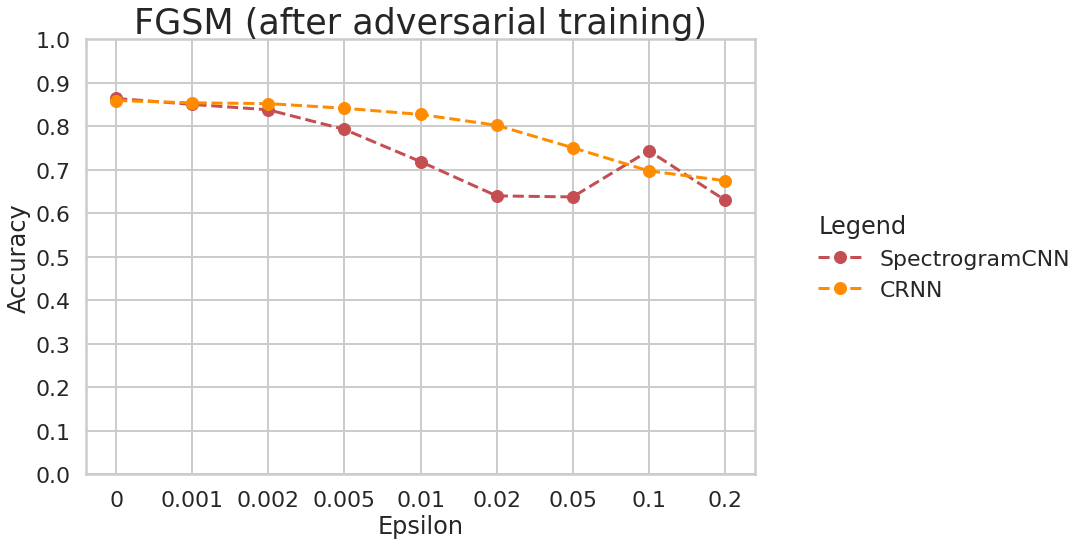

In [53]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                        #("optuna_spec8kd2_0.90.p", "SpectrogramCNN"),
                        ("SpectrogramCNN_8K_Dataset2_attack_L_inf_eps=0.13_iters=1_v3.p", "SpectrogramCNN"),
                        #("optuna_crnn8kd2_0.90.p", "CRNN"),
                        ("CRNN8k_D2_attack_L_inf_eps=0.05_iters=2_v55.p", "CRNN")
                         ])